In [1]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("BrightData/Goodreads-Books", split='train', streaming=True)
sample = ds.take(100000)  

# convert sample into df

import pandas as pd

df = pd.DataFrame(sample)

df.head()
print(len(df))

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100000


In [2]:
# Search for 'self-help' in genres column
self_help_df = df[df['genres'].str.contains('Self Help', case=False, na=False)]

# Display results and length
print(f"Number of self-help books: {len(self_help_df)}")
self_help_df


Number of self-help books: 469


,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price
381,https://www.goodreads.com/book/show/489467.Rep...,489467.Repotting,Repotting: 10 Steps for Redesigning Your Life,"[""Diana Holman""]",2.67,6,NaN,For every woman who feels stuck in her current...,"[""Self Help""]",3/1/2007,"{""name"":""Diana Holman"",""num_books"":2}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$7.99"""
408,https://www.goodreads.com/book/show/6158679-my...,6158679-my-anxious-mind,My Anxious Mind: A Teen's Guide To Managing An...,"[""Michael A. Tompkins""]",3.88,232,36.0,ABCT Self Help Book Seal of Merit Award\n\nCan...,"[""Nonfiction"",""Self Help"",""Psychology"",""Health...",7/1/2009,"{""name"":""Michael A. Tompkins"",""num_books"":36,""...","{""1_stars"":{""reviews_num"":8,""reviews_percentag...","""$11.46"""
1257,https://www.goodreads.com/book/show/82094.Beli...,82094.Believe_and_Achieve,Believe and Achieve: W. Clement Stone's 17 Pri...,"[""W. Clement Stone""]",4.15,157,11.0,Believe and Achieve explains exactly how the p...,"[""Self Help"",""Business"",""Nonfiction"",""Psycholo...",12/1/1987,"{""name"":""W. Clement Stone"",""num_books"":51,""num...","{""1_stars"":{""reviews_num"":6,""reviews_percentag...","""$3.99"""
1903,https://www.goodreads.com/book/show/7130661-li...,7130661-live-your-bliss,Live Your Bliss: Practices that Produce Happin...,"[""Terry Cole‐Whittaker""]",4.35,48,6.0,After years of teaching metaphysical principle...,"[""Self Help"",""Spirituality"",""Nonfiction"",""Pers...",11/10/2009,"{""name"":""Terry Cole‐Whittaker"",""num_books"":19,...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$9.40"""
2731,https://www.goodreads.com/book/show/21282452-t...,21282452-the-dodo-diet,"The DODO Diet: Rapid results, permanent fat lo...","[""Drew Price""]",3.00,18,1.0,"The D.O.D.O. Diet, or Day On, Day Off Diet wil...","[""Self Help""]",12/5/2013,"{""name"":""Drew Price"",""num_books"":3}","{""1_stars"":{""reviews_num"":3,""reviews_percentag...","""$14.99"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98718,https://www.goodreads.com/book/show/31932844-d...,31932844-dare-to-be-kind,Dare to Be Kind: How Extraordinary Compassion ...,"[""Lizzie Velásquez""]",3.66,577,121.0,"Born with a rare genetic condition, Lizzie Vel...","[""Nonfiction"",""Self Help"",""Inspirational"",""Mem...",6/6/2017,"{""name"":""Lizzie Velásquez"",""num_books"":9,""num_...","{""1_stars"":{""reviews_num"":7,""reviews_percentag...","""$9.99"""
99158,https://www.goodreads.com/book/show/18079546-j...,18079546-jim-cramer-s-get-rich-carefully,Jim Cramer's Get Rich Carefully,"[""Jim Cramer""]",3.81,1147,61.0,Tired of phony promises about getting rich qui...,"[""Finance"",""Nonfiction"",""Business"",""Personal F...",12/31/2013,"{""name"":""Jim Cramer"",""num_books"":27,""num_follo...","{""1_stars"":{""reviews_num"":27,""reviews_percenta...","""$9.99"""
99346,https://www.goodreads.com/book/show/28722690-t...,28722690-the-brain-fog-fix,The Brain Fog Fix: Thinking Fast and Slow: New...,"[""James Goldstein""]",2.70,10,2.0,"**New Releases 2016, ""The Brain Fog Fix: Think...","[""Self Help""]",1/24/2016,"{""name"":""James Goldstein"",""num_books"":8}","{""1_stars"":{""reviews_num"":2,""reviews_percentag...",None
99491,https://www.goodreads.com/book/show/22181620-o...,22181620-overcome-depression-and-end-your-suff...,Overcome Depression and End Your Suffering Now...,"[""Beau Norton""]",3.84,67,5.0,Overcoming depression has never been easier th...,"[""Self Help"",""Health""]",4/25/2014,"{""name"":""Beau Norton"",""num_books"":70,""num_foll...","{""1_stars"":{""reviews_num"":2,""reviews_percentag...",None


In [3]:
# Extract year from first_published and create new column with error handling
self_help_df['year_published'] = pd.to_datetime(self_help_df['first_published'], format='%m/%d/%Y', errors='coerce').dt.year

# Reorder columns to put year_published next to first_published
cols = list(self_help_df.columns)
first_published_idx = cols.index('first_published')
cols.remove('year_published')
cols.insert(first_published_idx + 1, 'year_published')
self_help_df = self_help_df[cols]

# Print count of valid year values
print(f"Number of valid year values: {self_help_df['year_published'].count()}")
print(f"Number of invalid/missing year values: {self_help_df['year_published'].isna().sum()}")

# Display first few rows to verify
self_help_df.head()


Number of valid year values: 466
Number of invalid/missing year values: 3


/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_28027/3071518856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_help_df['year_published'] = pd.to_datetime(self_help_df['first_published'], format='%m/%d/%Y', errors='coerce').dt.year


,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,year_published,about_author,community_reviews,kindle_price
381,https://www.goodreads.com/book/show/489467.Rep...,489467.Repotting,Repotting: 10 Steps for Redesigning Your Life,"[""Diana Holman""]",2.67,6,NaN,For every woman who feels stuck in her current...,"[""Self Help""]",3/1/2007,2007.0,"{""name"":""Diana Holman"",""num_books"":2}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$7.99"""
408,https://www.goodreads.com/book/show/6158679-my...,6158679-my-anxious-mind,My Anxious Mind: A Teen's Guide To Managing An...,"[""Michael A. Tompkins""]",3.88,232,36.0,ABCT Self Help Book Seal of Merit Award\n\nCan...,"[""Nonfiction"",""Self Help"",""Psychology"",""Health...",7/1/2009,2009.0,"{""name"":""Michael A. Tompkins"",""num_books"":36,""...","{""1_stars"":{""reviews_num"":8,""reviews_percentag...","""$11.46"""
1257,https://www.goodreads.com/book/show/82094.Beli...,82094.Believe_and_Achieve,Believe and Achieve: W. Clement Stone's 17 Pri...,"[""W. Clement Stone""]",4.15,157,11.0,Believe and Achieve explains exactly how the p...,"[""Self Help"",""Business"",""Nonfiction"",""Psycholo...",12/1/1987,1987.0,"{""name"":""W. Clement Stone"",""num_books"":51,""num...","{""1_stars"":{""reviews_num"":6,""reviews_percentag...","""$3.99"""
1903,https://www.goodreads.com/book/show/7130661-li...,7130661-live-your-bliss,Live Your Bliss: Practices that Produce Happin...,"[""Terry Cole‐Whittaker""]",4.35,48,6.0,After years of teaching metaphysical principle...,"[""Self Help"",""Spirituality"",""Nonfiction"",""Pers...",11/10/2009,2009.0,"{""name"":""Terry Cole‐Whittaker"",""num_books"":19,...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$9.40"""
2731,https://www.goodreads.com/book/show/21282452-t...,21282452-the-dodo-diet,"The DODO Diet: Rapid results, permanent fat lo...","[""Drew Price""]",3.00,18,1.0,"The D.O.D.O. Diet, or Day On, Day Off Diet wil...","[""Self Help""]",12/5/2013,2013.0,"{""name"":""Drew Price"",""num_books"":3}","{""1_stars"":{""reviews_num"":3,""reviews_percentag...","""$14.99"""


(array([  0.,   2.,   1.,   0.,   3.,   4.,   3.,  13.,  25.,  52., 134.,
        229.]),
 array([1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980.,
        1990., 2000., 2010., 2020.]),
 <BarContainer object of 12 artists>)

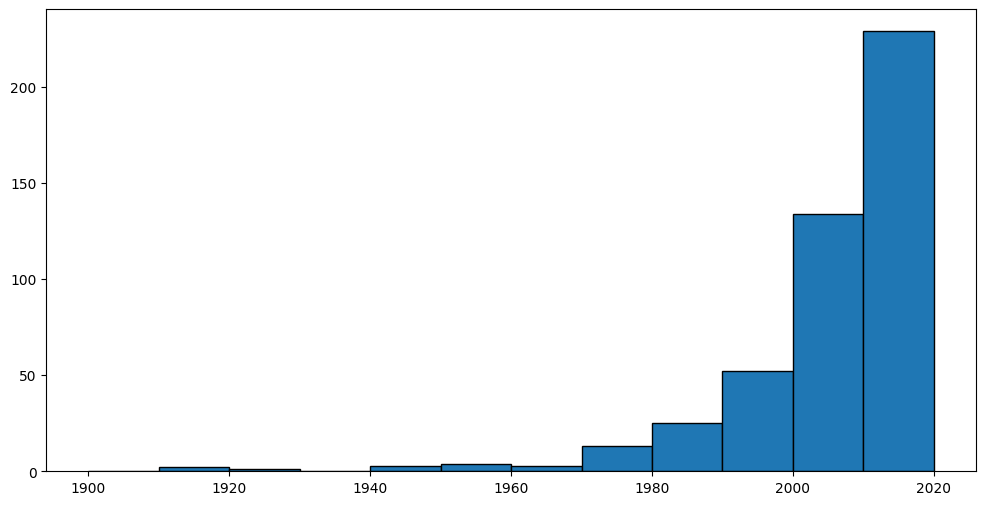

In [4]:
# plot year_published 
import matplotlib.pyplot as plt

# Plot the distribution of year_published
plt.figure(figsize=(12, 6))
plt.hist(self_help_df['year_published'], bins=range(1900, 2025, 10), edgecolor='black')


In [ ]:
# Import required libraries
import requests
import pandas as pd

# Define API configuration


# Define categories for classification
categories = [
    "Self-Esteem & Confidence",
    "Stress & Anxiety Management",
    "Relationship & Communication",
    "Career & Professional Growth",
    "Mindfulness & Spirituality",
    "Motivation & Productivity",
    "Faith & Religious Growth",
    "Emotional Intelligence & Self-Awareness",
    "Overcoming Habits & Addictions",
    "Personal Transformation & Life Changes"
]

# Function to query the API
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

# Get first 10 summaries and analyze them
results = []
for i, summary in enumerate(self_help_df['summary'].head(20)):
    if pd.isna(summary):  # Skip if summary is NaN
        continue
        
    output = query({
        "inputs": summary,
        "parameters": {"candidate_labels": categories}
    })
    
    # Print output for debugging
    print(f"API Response: {output}")
    
    # Add error handling
    if isinstance(output, dict) and 'labels' in output:
        # Get top 3 categories and scores
        top_3_categories = ", ".join(output['labels'][:3])
        top_3_scores = ", ".join([str(score) for score in output['scores'][:3]])
        
        results.append({
            'name': self_help_df['name'].iloc[i],
            'summary': summary,
            'predicted_category': top_3_categories,
            'confidence_score': top_3_scores
        })
    else:
        print(f"Skipping invalid response for summary {i}")

# Create DataFrame from results
results_df = pd.DataFrame(results)
display(results_df)

API Response: {'sequence': 'For every woman who feels stuck in her current life, there is now an  repotting! This book is for 21st-century women who don’t need a better daily planner—they need a better life. Diana Holman and Ginger Pape give you the answers to the  How do I change my life? No matter where you are on your life’s journey, you can apply the ten-step process and come away with a personal repotting plan. This book offers an interactive program with very specific exercises to enable you to tailor the repotting experience to your own circumstances. It also provides tests and exercises to help you determine your readiness to change, identify your priorities and goals, create a strategy, and make it all happen. You’ll draw inspiration from stories about real women who have joined the repotting movement, and you’ll be able to see yourself in the life of another repotter. If you’re ready to make a radical departure from the status quo of your life, then repot, repot, repot! Readi

,name,summary,predicted_category,confidence_score
0,Repotting: 10 Steps for Redesigning Your Life,For every woman who feels stuck in her current...,"Personal Transformation & Life Changes, Self-E...","0.2476719468832016, 0.14144274592399597, 0.124..."
1,My Anxious Mind: A Teen's Guide To Managing An...,ABCT Self Help Book Seal of Merit Award\n\nCan...,"Self-Esteem & Confidence, Personal Transformat...","0.25723034143447876, 0.21400107443332672, 0.13..."
2,Believe and Achieve: W. Clement Stone's 17 Pri...,Believe and Achieve explains exactly how the p...,"Self-Esteem & Confidence, Personal Transformat...","0.16818472743034363, 0.1571137011051178, 0.146..."
3,Live Your Bliss: Practices that Produce Happin...,After years of teaching metaphysical principle...,"Self-Esteem & Confidence, Faith & Religious Gr...","0.21260400116443634, 0.1597830057144165, 0.146..."
4,"The DODO Diet: Rapid results, permanent fat lo...","The D.O.D.O. Diet, or Day On, Day Off Diet wil...","Personal Transformation & Life Changes, Self-E...","0.17649416625499725, 0.1423063725233078, 0.113..."
5,Practical Guide to Self Hypnosis,This is a pre-1923 historical reproduction tha...,"Self-Esteem & Confidence, Faith & Religious Gr...","0.14249403774738312, 0.13095343112945557, 0.10..."
6,The Tidy Closet: Tips From A French Woman - Ea...,Join the thousands of other women who have bou...,"Self-Esteem & Confidence, Motivation & Product...","0.1690794974565506, 0.1574414074420929, 0.1278..."
7,The Thinker’s Guide to Analytic Thinking,This guide focuses on the intellectual skills ...,"Self-Esteem & Confidence, Personal Transformat...","0.14952604472637177, 0.14323756098747253, 0.13..."
8,The China Study: The Most Comprehensive Study ...,"Even today, as trendy diets and a weight-loss ...","Relationship & Communication, Emotional Intell...","0.2098274677991867, 0.14570823311805725, 0.133..."
9,"How to Handle Your Emotions: Anger, Depression...",The first of an exciting new series of topical...,"Emotional Intelligence & Self-Awareness, Self-...","0.15723060071468353, 0.13825073838233948, 0.12..."


In [23]:
# !pip install bertopic



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 73.3 MB/s eta 0:00:0000:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.


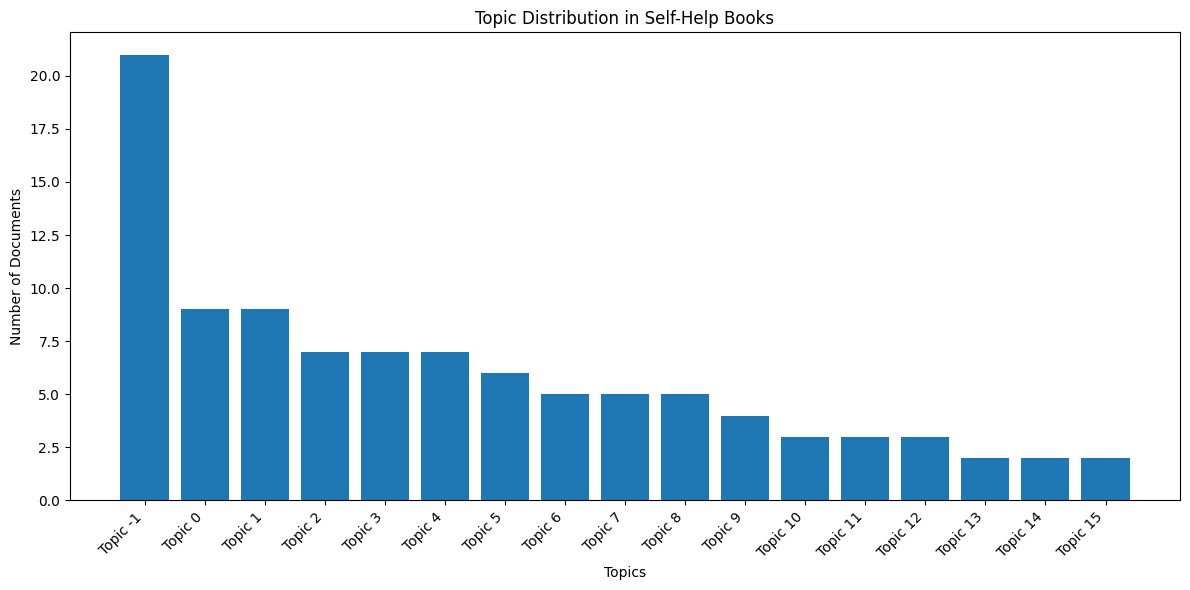


Topic Details:

Topic -1: -1_the_and_to_of

Topic 0: 0_to_and_the_in
Top terms: [('to', 0.040694700985289836), ('and', 0.040670616771753626), ('the', 0.03583078738175378), ('in', 0.0289249145911201), ('of', 0.028569283238209207), ('social', 0.025815581893087886), ('your', 0.025402108390948572), ('you', 0.022986236976275838), ('how', 0.022654189125750644), ('that', 0.02123787037397065)]

Topic 1: 1_evernote_you_to_your
Top terms: [('evernote', 0.05283877642290452), ('you', 0.046210921891053226), ('to', 0.04322119560389949), ('your', 0.03747107761966057), ('and', 0.03478088572569975), ('the', 0.03219658700506239), ('how', 0.03024767991394011), ('for', 0.02474495186630082), ('or', 0.023606872420982687), ('allen', 0.022386932635357498)]

Topic 2: 2_deer_book_happy_learn
Top terms: [('deer', 0.09734239882945163), ('book', 0.08116344844372785), ('happy', 0.048671199414725815), ('learn', 0.04664954402044737), ('pictures', 0.046419807821990074), ('books', 0.03680350898905935), ('positivity', 

AxisError: axis 1 is out of bounds for array of dimension 1

In [8]:
# Import required libraries
from bertopic import BERTopic
import numpy as np
import matplotlib.pyplot as plt

# Get first 100 non-null summaries
summaries = self_help_df['summary'].head(100).dropna().tolist()
titles = self_help_df['name'].head(100).dropna().tolist()

# Create and fit the model
topic_model = BERTopic(language="english", min_topic_size=2)
topics, probs = topic_model.fit_transform(summaries)

# Get topic info and frequencies
topic_info = topic_model.get_topic_info()
topic_freqs = topic_info['Count'].values
topic_names = [f"Topic {i}" for i in topic_info['Topic']]

# Create bar plot of topic frequencies
plt.figure(figsize=(12, 6))
plt.bar(range(len(topic_freqs)), topic_freqs)
plt.xticks(range(len(topic_freqs)), topic_names, rotation=45, ha='right')
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution in Self-Help Books')
plt.tight_layout()
plt.show()

# Print topics and their key terms
print("\nTopic Details:")
for topic in topic_model.get_topic_info().iterrows():
    print(f"\nTopic {topic[1]['Topic']}: {topic[1]['Name']}")
    if topic[1]['Topic'] != -1:  # Skip outlier topic
        print("Top terms:", topic_model.get_topic(topic[1]['Topic']))

# Create DataFrame with results
results_df = pd.DataFrame({
    'Title': titles,
    'Summary': summaries,
    'Topic': topics,
    'Probability': probs.max(axis=1)
})
display(results_df)



# # !pip install numpy==1.24.0
# # !pip install bertopic
# !pip install nbformat>=4.2.0

# # Import required libraries
# from bertopic import BERTopic
# import numpy as np

# # Get first 20 non-null summaries
# summaries = self_help_df['summary'].head(100).dropna().tolist()
# titles = self_help_df['name'].head(100).dropna().tolist()

# # Create and fit the model
# topic_model = BERTopic(language="english", min_topic_size=2)
# topics, probs = topic_model.fit_transform(summaries)

# # Visualize results
# # 1. Topic overview
# fig = topic_model.visualize_topics()
# fig.show()

# # 2. Print topics and their key terms
# print("\nTopic Details:")
# for topic in topic_model.get_topic_info().iterrows():
#     print(f"\nTopic {topic[1]['Topic']}: {topic[1]['Name']}")
#     if topic[1]['Topic'] != -1:  # Skip outlier topic
#         print("Top terms:", topic_model.get_topic(topic[1]['Topic']))

# # 3. Create a DataFrame with documents and their topics
# results_df = pd.DataFrame({
#     'Title': titles,
#     'Summary': summaries,
#     'Topic': topics,
#     'Probability': probs.max(axis=1)
# })
# display(results_df)